# Which games are successful?
 

**Context**: The year is 2016, and we are working at an online video game seller company, currently going through campaign planning for 2017.


## The objetive of this project

- With this project, we aim to answer the following question: what are possible patterns that determine if a game is sucessful or not?

- The reason for this project is so that we can better plan ad campaigns based on the findings of the question above.

This project is split into 6 main parts, as follows:
- **Part 1**: Loading the data & libraries, overall view of data and possible issues, define steps to solve them.


- **Part 2**: Prepare the data - clean it of duplicates and absent values and identify and correct other issues found, such as naming errors, wrong column types.


 - **Part 3**: Analyse the data, look for trends, historic patterns, distribution of sales, comparisons, etc.


 - **Part 4**: Create consumer profile based on categorical characteristics, such as region, game genre, etc.


 - **Part 5**: Test hypothesis. Currently, they are the following:
    1. Average user score for PC and Xbox One users are the same.
    2. Average user score for Action genre and Sports genre are different.
    
    
 - **Part 6**: General insights, findings and conclusion.

### Loading libraries, data, and general overview.

First, here is the documentation of the data we have:

`Name`: name of the video game.

`Platform`: platform of the game.

`Year_of_Release`: year the game was released. 

`Genre`: the genre of the game.

`NA_sales`: north american sales in millions USD

`EU_sales`: europe sales in millions USD

`JP_sales`: japan sales in millions USD

`Other_sales`: sales in other countries, millions USD

`Critic_Score`: critics score, maximum 100

`User_Score`: user score, maximum 10

`ESRB`: Entertainment Software Rating Board rating

2016 data might be incomplete.

In [1]:
#loading libraries
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
#loading data
df = pd.read_csv('/datasets/games.csv')

Libraries and data are loaded, lets take a look at it.

In [3]:
#General view of data
display(df.head())
print()
df.info()
print()
display(df.describe())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Initial Overview**
1. We see there are some missing values, specifically for `Rating`, `User_Score`, and `Critic_Score`. We'll take a deeper look at it in the next cell.


2. In terms of column data types, we have the following:
    - Year_of_Release is in float format, could be converted to int, although not needed.
    - Critic_Score, we might be able to convert to int as well, although not needed.
    - *Needed*> User_Score is in object format for some reason, we'll investigate in the next cell.


3. The column names should be converted to lowercase, for easier use. We'll do it in the next cell.


4. No anomalies seen in the columns, data makes sense (for example, no negative numbers in User_Score or Year_of_Release beyond 2016).

## Preparing and cleaning data

In [4]:
#Renaming the columns to lowercase
df = df.rename(columns=lambda x: x.lower())

#Checking missing values, deeper look at rating
print(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


### Missing Values, data types

Lets take drop the missing values for the year_of_release column and the name and genre column first, as for those, there isn't much we can do, and it represents a very small portion of the full dataset.

In [5]:
#Dealing with name, genre and year_of_release nan values
df_1 = df.dropna(subset=['year_of_release','name','genre']).reset_index(drop = True)


print(df_1.isna().sum())
print(len(df_1))

#Converting year to int
df_1['year_of_release'] = df_1['year_of_release'].astype(int)

df_1.head()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64
16444


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Alright, now we have to take care of the user_score column data type, which currently is object, and we want it in float.


We saw an error when trying to convert the user_score column, a 'tbd' value (to be defined). Lets take a look at what the other columns show for this value, and see if there is a pattern. If there isn't any, we are making these into nan values.

In [6]:
#checking user_score tbd
df_1.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


We don't see any pattern, such as the same year, same genre... We'll make these 'tbds' into nans.

In [7]:
df_1['user_score'] = df_1['user_score'].replace('tbd', np.NaN)
df_1['user_score'] = df_1['user_score'].astype(float)
df_1.info()
df_1.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

`user_score` is now converted to float. Next steps are in regards to dealing with these empty values.

Lets check if the user_scores and critic_scores are somewhat similar, and if so, we can fill one column with value missing with the other and vice-versa. Where both data points are missing, we'll leave as NaN.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,difference
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,-4.0
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,-1.0
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,0.0
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,4.0
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,-8.0


count    6894.000000
mean       -1.585292
std        12.963828
min       -62.000000
25%        -9.000000
50%        -2.000000
75%         5.000000
max        66.000000
Name: difference, dtype: float64


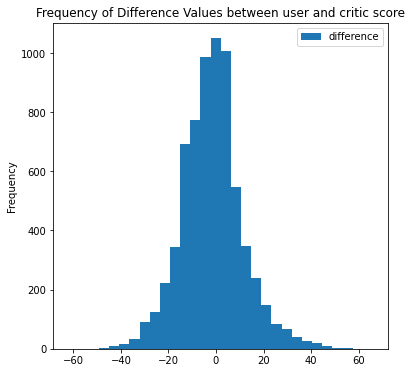

In [8]:
#Checking difference between scores
df_diff_scores = df_1.loc[(df_1['user_score'].notna()) & (df_1['critic_score'].notna())]
df_diff_scores = df_diff_scores.reset_index(drop = True)
df_diff_scores['user_score'] = df_diff_scores['user_score']*10
df_diff_scores['difference'] = df_diff_scores['critic_score'] - df_diff_scores['user_score']

display(df_diff_scores.head())
print(df_diff_scores['difference'].describe())
df_diff_scores.plot(kind = 'hist', y = 'difference', bins = 30, figsize = (6,6))
plt.title('Frequency of Difference Values between user and critic score')
plt.show()


As we can see in the histogram, most of the values are concentrated within 13 points of difference up or down (1 std) from the mean, which is -1.5, and also close to the median, which is -2.


What this means for us is that, on average, the user score and the critic score are very similar. We can fill the values of one column the same as the other column, if missing in one of them, and do this without biasing the data too much. 


We'll make nan values in the user_score column to be the same as the critic_score column + 2 (median of difference between scores), and for the inverse, -2, e.g. critic_score = user_score - 2.


Let's just check if there are any cases where we have a big difference in missing values from one or another column.

In [9]:
miss_diff = df_1.pivot_table(index = 'platform',
                values = ['user_score','critic_score'],
                aggfunc = 'count').reset_index()

miss_diff['diff_missing'] = miss_diff['critic_score'] - miss_diff['user_score']

#Final result, filtering out the ones that have no difference
miss_diff.sort_values(by = 'diff_missing', ascending = False).query('diff_missing != 0')

,platform,critic_score,user_score,diff_missing
4,DS,708,512,196
6,GBA,430,251,179
29,XB,706,571,135
7,GC,437,357,80
16,PS2,1275,1220,55
19,PSP,456,418,38
15,PS,196,159,37
26,Wii,568,548,20
18,PS4,252,257,-5
2,3DS,166,171,-5


Alright, most of the platforms don't show a particularly alarming difference between the nan in each column, so we can work on the discussed above without worrying too much about this biasing the data.

In [10]:
df_1['user_score'] = df_1['user_score']*10
df_1['user_score'] = df_1['user_score'].fillna(df_1['critic_score'] + 2)
df_1['critic_score'] = df_1['critic_score'].fillna(df_1['user_score'] - 2)

print(df_1.isna().sum())
display(df_1.head())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7892
user_score         7892
rating             6676
dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


We were able to reduce critic_score nan values from 8461 to 7892 (gain of 569 data points) and user_score from 8981 to 7892 (gain of 1089 data points). Here, tbd values are included, meaning, user_scores that are still to be decided. Nevertheless, historic data shows us that these scores are largely the same as the critic scores, so this is not an issue, and on top of that, it was a small part of the dataset (1k rows versus the 16k total).


For the remaining empty values, we will leave as is for now, because we want to work as close to reality as possible, with as little bias to the data as possible. If we can run a proper analysis with the values we currently have, we'll do that.
 - **Observation on missing critic and user scores**: if the need comes and we have to fill these empty values to run a proper analysis, we'll fill them with the median or mean filtered by platform, genre and year.
 
 
 - **Possible reasons for empty values**: In the case of scores, it might be that the games are too small in terms of revenue or popularity to be scored. It can also be that they might be too old and thus have no scoring of the time. Same goes for the rating.
 
If we were to fill the missing user and critic scores, below is the code in comment form to do so. We'll leave it here for easy access later, if needed.

In [11]:
#Grouping and finding means/medians by genre, platform and year_of_release
# df_1['user_score'] = df_1.groupby(['genre', 'year_of_release', 'platform'])['user_score'].transform(lambda x: x.fillna(x.mean()))

### Checking categorical values
Here, we'll just do a quick check on platform, genre and rating values, see if there is anything anomalous or that should be corrected.

In [12]:
print(df_1['platform'].value_counts())
print()
print(df_1['genre'].value_counts())
print()
print(df_1['rating'].value_counts())

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64


Nothing strange here. Lets move on.


### Enriching the dataset
We noticed the sales are split by region, but we would also like to see the total sales for each game, aggregated. Lets add a total revenue column to the dataset, for now.

In [13]:
#Adding total revenue column
rev_cols = ['na_sales','eu_sales','jp_sales','other_sales']
df_1['total_revenue'] = df_1[rev_cols].sum(axis = 1)
display(df_1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Data Analysis

Here we aim to do some more EDA, looking at a few data points, and alse dig a bit deeper into the dataset.


**Let's start with how many games were lauched per year:**

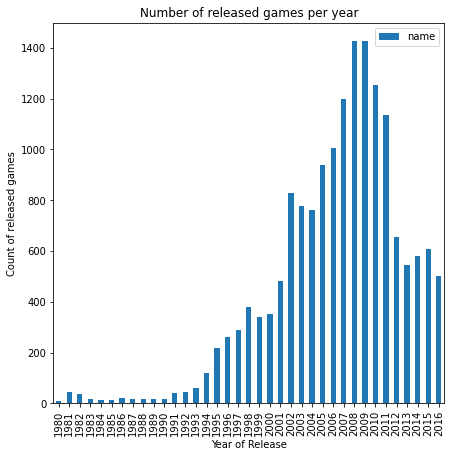

In [14]:
games_by_year = df_1.pivot_table(index = 'year_of_release',
                values = 'name',
                aggfunc = 'count')

games_by_year.plot(kind = 'bar', figsize = (7,7))
plt.xlabel('Year of Release')
plt.ylabel('Count of released games')
plt.title('Number of released games per year')
plt.show()

It seems the release of new games really started to pick up after the year 2000, and fell considerably after 2009.

**Now, let's take a look at sales per platform.**

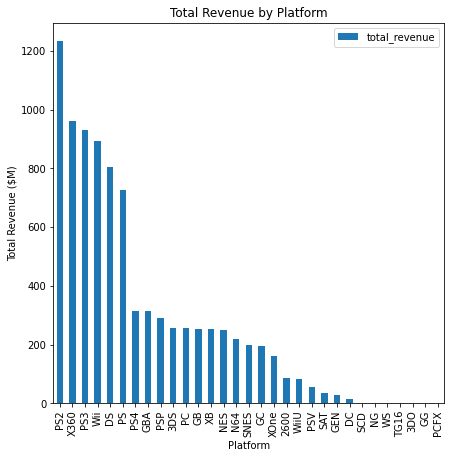

In [15]:
#Largest revenues per platform
revenues_platform = (df_1
     .pivot_table(index = 'platform',values = 'total_revenue', aggfunc = 'sum')
     .sort_values(by = 'total_revenue', ascending = False))

revenues_platform.plot(kind = 'bar', figsize = (7,7))
plt.title('Total Revenue by Platform')
plt.ylabel('Total Revenue ($M)')
plt.xlabel('Platform')
plt.show()

Looking at the top 5 platforms in overall sales, with sales by year:

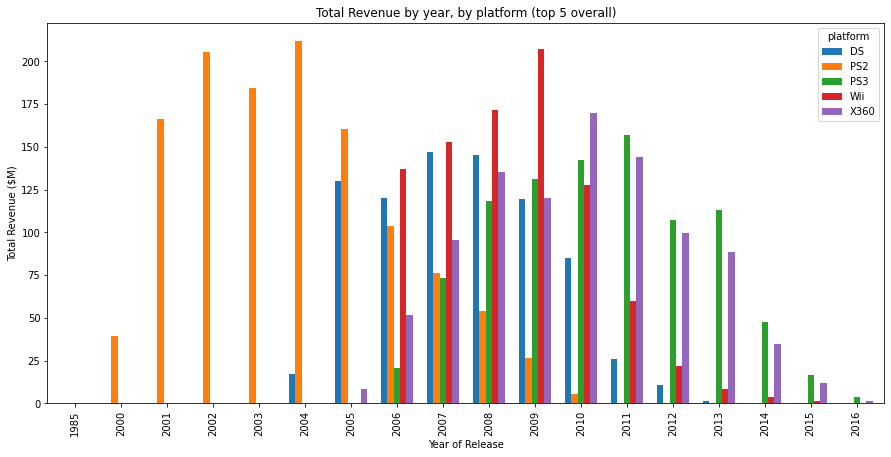

In [16]:
#listing the top 5 based on total revenue all years
top5 = list(revenues_platform.index.values[:5])

#dataset for yearly revenue of top 5 platforms
top_5_plat = df_1.query('platform == @top5').pivot_table(index = 'year_of_release',
                                                        columns = 'platform',
                                                        values = 'total_revenue',
                                                        aggfunc = 'sum')

top_5_plat.plot(kind = 'bar', figsize = (15,7), width = 0.7)
plt.xlabel('Year of Release')
plt.ylabel('Total Revenue ($M)')
plt.title('Total Revenue by year, by platform (top 5 overall)')
plt.show()


We can see some trends in the chart above:
 - Revenues from PS2 games grew from 2000 to 2004, then declined until 2010.
 - DS grew from 2004 to 2007-8, then declined until 2013.
 - X360 has sales starting from 2005, peaked in 2010 and then declined until 2016.
 - Wii started strong in 2006, grew until 2009, declined after that until 2014-15.
 - PS3, grew from 2006 to 2011, then declined until 2016.


**Summary**

From the data, we can see that the lifecycle of a videogame platform is around 8 to 10 years, where the first half of these years is marked by growth, and the second half, marked by decline.


With this information and what we analyzed earlier in regards to revenue per year, we can better refine the data to bring only what we need to model 2017:
 - Since the average amount of years that a platform grows is 4, we'll grab data from recent years and look at the trends of the platforms.
 - To filter platforms, we'll look at the largest revenues in this recent period as well.

In [17]:
top_last_5y = df_1.query('year_of_release > 2016 - 5').pivot_table(index = 'platform',
                                                    values = 'total_revenue',
                                                    aggfunc = 'sum').sort_values(by = 'total_revenue', ascending = False)
top_last_5y

,total_revenue
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


We see that from WiiU to XOne, the revenue almost doubles. Let's check the trends of these platforms, since maybe WiiU is still rising, for example, and some others are falling.

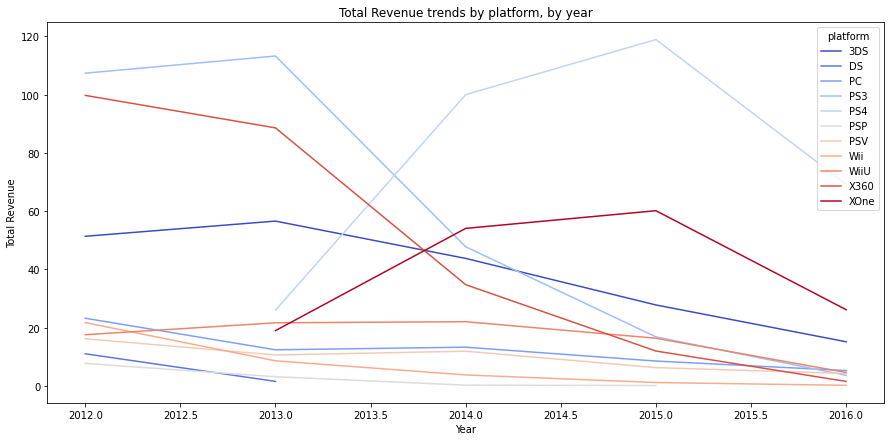

In [18]:
trend_latest = df_1.query('year_of_release > 2016 - 5').pivot_table(index = 'year_of_release',
                                                    values = 'total_revenue',
                                                     columns = 'platform',
                                                    aggfunc = 'sum').plot(kind = 'line', figsize = (15,7), cmap = 'coolwarm')
plt.title('Total Revenue trends by platform, by year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

First thing to notice is that we don't see any uptrend in sales by year, for any of the platforms there. 
 - Lets keep only the top 5 sales from the defined period, and work on that dataset, now filtered as follows:
  - Last 5 Years to capture most recent trends (2012 - 2016).
  - Top 5 sales platforms of the last 5 years, to work with largest platforms.

In [19]:
#Filtering full dataset to smaller subset, most recent trends
top5_latest = list(top_last_5y.index.values[:5])
df_1_filtered = df_1.query('platform == @top5_latest and year_of_release >= 2012').reset_index(drop = True)

display(df_1_filtered.head())
df_1_filtered.isna().sum()
df_1_filtered.shape

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79


(1820, 12)

Looking at the new dataset, here is what we have in terms of leading sales by platform, and then by genre:

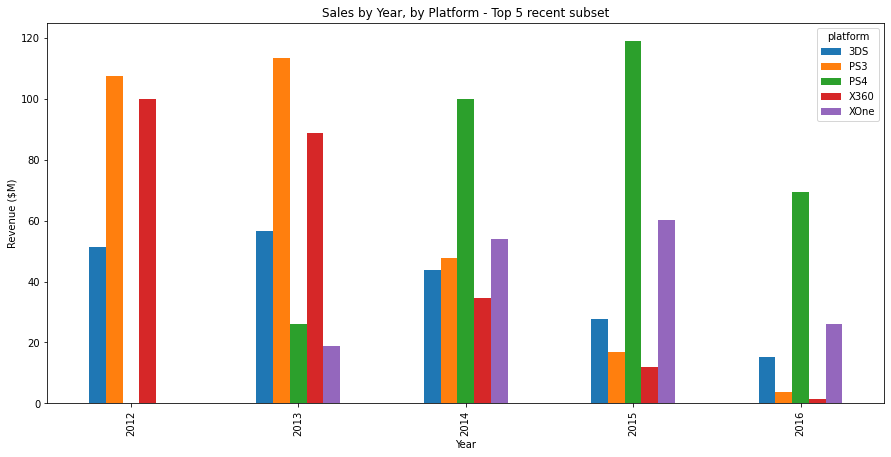

In [20]:
df_1_filtered.pivot_table(index = 'year_of_release',
                         columns = 'platform',
                         values = 'total_revenue',
                         aggfunc = 'sum').plot(kind = 'bar', figsize = (15,7))

plt.title('Sales by Year, by Platform - Top 5 recent subset')
plt.xlabel('Year')
plt.ylabel('Revenue ($M)')
plt.show()

**Top 5 Platforms in recent years, observations:**


 - From the chart above, currently, the **leading** platform in sales in 2016 is the **PS4**, which has dominated sales since 2014. PS3 and X360 are disappearing, and competing with the PS4 we have XOne and 3DS, but PS4 has a large margin over them.
 

With the filtered dataset defined, lets also compare it with the full dataset in some boxplots.

Filtered Subset


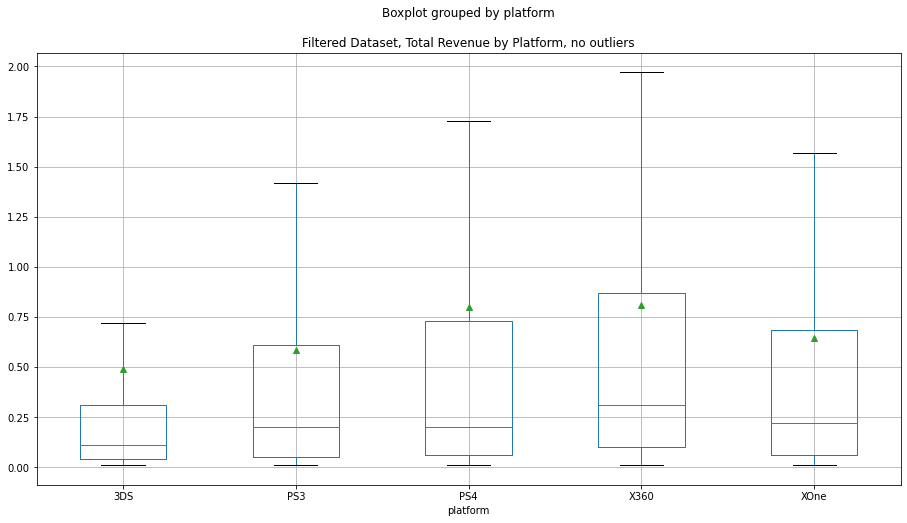

In [21]:
print('Filtered Subset')
df_1_filtered.boxplot(column ='total_revenue', by = 'platform', showfliers = False, figsize = (15,8), showmeans = True)
plt.title('Filtered Dataset, Total Revenue by Platform, no outliers')
plt.show()

In the boxplot above, for the filtered data we chose, we can observe that the medians are not too far away from each other, and the boxes (interquartile ranges) are similar except maybe for the 3DS. In summary, there isn't much difference in global sales between these platform.

Full Dataset


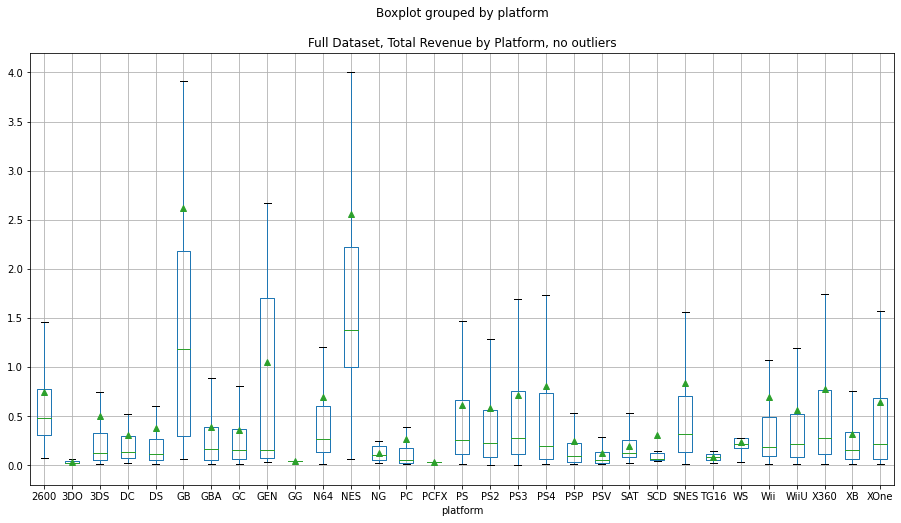

In [22]:
print('Full Dataset')
df_1.boxplot(column ='total_revenue', by = 'platform', showfliers = False, figsize = (15,8), showmeans = True)
plt.title('Full Dataset, Total Revenue by Platform, no outliers')
plt.show()

Now looking at the full dataset, there are a few standouts:
 - NES has the highest median, and a very high average as well. 
 - GB (GameBoy) also has a very big interquartile range and a high median and mean.

### Correlations
Moving on, its time to look at the relationship between user and critic scores for the games of a platform, and how and if these affect the sales of games in a given platform. We'll look into PS4, since its the dominating platform in 2016.

PS4 Correlation Matrix


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_revenue
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.022632,0.154175,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.411060,-0.022280,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.343569,-0.050087,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.320715,0.169722,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.405063,-0.036938,0.998051
critic_score,-0.022632,0.411060,0.343569,0.320715,0.405063,1.000000,0.572944,0.402583
user_score,0.154175,-0.022280,-0.050087,0.169722,-0.036938,0.572944,1.000000,-0.033307
total_revenue,-0.235032,0.928160,0.958157,0.527129,0.998051,0.402583,-0.033307,1.000000


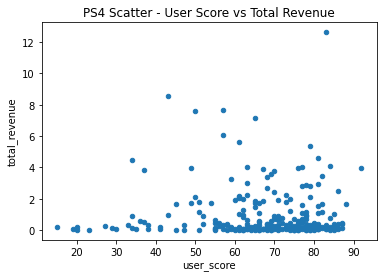

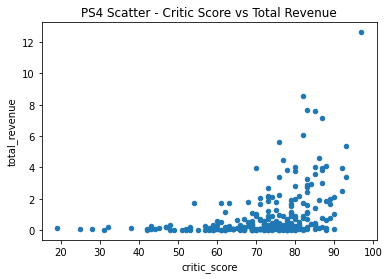

In [23]:
#Correlation matrix for general overview of metric relationships
PS4 = df_1_filtered.query('platform == "PS4"')
print("PS4 Correlation Matrix")
display(PS4.corr())

#Correlation Charts
PS4.plot(kind = 'scatter', x = 'user_score', y = 'total_revenue')
plt.title('PS4 Scatter - User Score vs Total Revenue')
plt.show()

PS4.plot(kind = 'scatter', x = 'critic_score', y = 'total_revenue')
plt.title('PS4 Scatter - Critic Score vs Total Revenue')
plt.show()

**Scatterplots and correlation matrix analysis, PS4**
 - Interesting, in the scatterplots above we see that the higher the `critic_score`, the higher the variance in `total_revenue`. On top of that, in the correlation matrix, we see that there is a positive correlation of 0.4 between `critic_score` and `total_revenue`, meaning, for each point increase in `critic_score`, `total_revenue` increases by 0.4.
 
 
 - The same cannot be said for `user_score`, which by the correlation matrix, seems to have no relationship with revenue.
 
**Lets look at the same games for a different platform, and see how do the scores relate to revenues for that platform.**

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
541,7 Days to Die,PS4,2016,Action,0.04,0.08,0.0,0.02,45.0,59.0,M,0.14
702,7 Days to Die,XOne,2016,Action,0.03,0.02,0.0,0.00,35.0,52.0,M,0.05
618,Adventure Time: Finn & Jake Investigations,PS3,2015,Action,0.02,0.05,0.0,0.01,NaN,NaN,NaN,0.08
629,Adventure Time: Finn & Jake Investigations,3DS,2015,Action,0.03,0.05,0.0,0.01,NaN,NaN,NaN,0.09
650,Adventure Time: Finn & Jake Investigations,X360,2015,Action,0.03,0.05,0.0,0.01,NaN,NaN,NaN,0.09


905

Number of games per platform platform
3DS      19
PS3     171
PS4     392
X360    106
XOne    217
Name: platform, dtype: int64



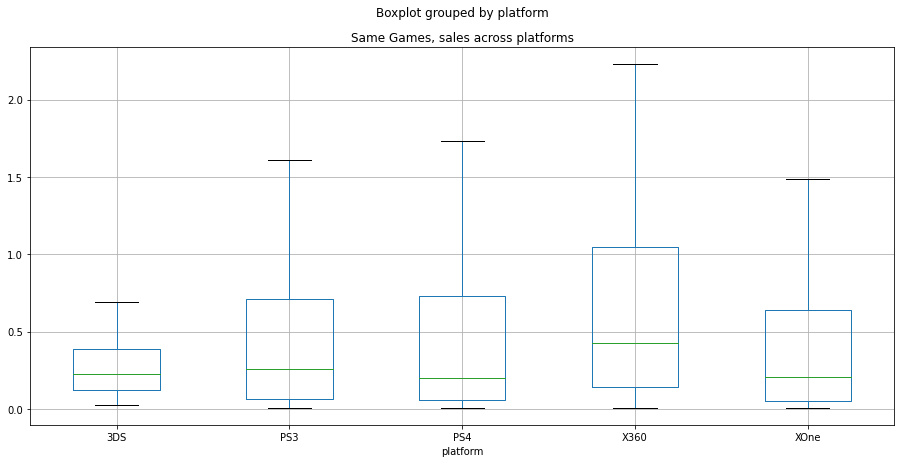

In [24]:
games = PS4['name'].unique()
games = list(games)

games_plat = df_1_filtered.query('name == @games').reset_index(drop = True)
display(games_plat.sort_values(by = 'name').head())
print(len(games_plat))
print()
print('Number of games per platform', games_plat.groupby('platform')['platform'].count())
print()
games_plat.boxplot(by='platform', column='total_revenue', showfliers = False, figsize = (15,7))
plt.title('Same Games, sales across platforms')
plt.show()

**Analysis**

It seems these games sell more in the X360 than in the PS4 or any other platform, observing the median and the IQR. Lets take a look at the correlation between critic and user scores there, for this dataset and selection of games, and also for the XOne, as it is the second platform with most sales in 2016, after the PS4.

XOne Correlation Matrix


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_revenue
year_of_release,1.000000,-0.261583,-0.201472,-0.062200,-0.260970,-0.005307,0.076292,-0.254136
na_sales,-0.261583,1.000000,0.763502,0.405675,0.987134,0.369077,-0.106514,0.968606
eu_sales,-0.201472,0.763502,1.000000,0.396086,0.854945,0.346241,-0.089063,0.900062
jp_sales,-0.062200,0.405675,0.396086,1.000000,0.421443,0.180897,0.085298,0.428402
other_sales,-0.260970,0.987134,0.854945,0.421443,1.000000,0.392053,-0.106581,0.995210
critic_score,-0.005307,0.369077,0.346241,0.180897,0.392053,1.000000,0.529821,0.391075
user_score,0.076292,-0.106514,-0.089063,0.085298,-0.106581,0.529821,1.000000,-0.107693
total_revenue,-0.254136,0.968606,0.900062,0.428402,0.995210,0.391075,-0.107693,1.000000


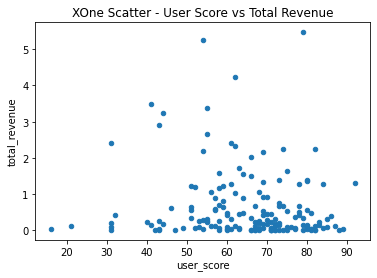

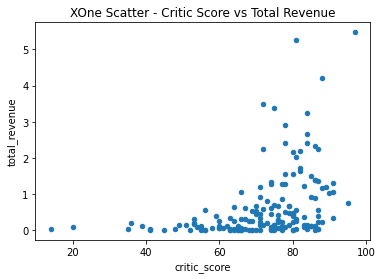

In [25]:
XOne = games_plat.query('platform == "XOne"')
print("XOne Correlation Matrix")
display(XOne.corr())

#Correlation Charts
XOne.plot(kind = 'scatter', x = 'user_score', y = 'total_revenue')
plt.title('XOne Scatter - User Score vs Total Revenue')
plt.show()

XOne.plot(kind = 'scatter', x = 'critic_score', y = 'total_revenue')
plt.title('XOne Scatter - Critic Score vs Total Revenue')
plt.show()

**Analysis: XOne vs PS4, same games**

Comparing the PS4 and XOne critic and user scores correlations with the total revenue, we note a rather similar pattern: critic scores have a positive correlation with revenue, as in, the higher the critic score, the higher the revenue of the game tends to be, and user scores seem to have almost no correlation in the PS4, and a very weak negative correlation in XOne.

X360 Correlation Matrix


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_revenue
year_of_release,1.000000,-0.342357,-0.325204,-0.414771,-0.346200,-0.597359,-0.333450,-0.348270
na_sales,-0.342357,1.000000,0.862325,0.650731,0.984931,0.233611,-0.058382,0.983699
eu_sales,-0.325204,0.862325,1.000000,0.630366,0.932765,0.233719,-0.041979,0.939278
jp_sales,-0.414771,0.650731,0.630366,1.000000,0.659692,0.262030,0.004913,0.667149
other_sales,-0.346200,0.984931,0.932765,0.659692,1.000000,0.237298,-0.064819,0.998715
critic_score,-0.597359,0.233611,0.233719,0.262030,0.237298,1.000000,0.808221,0.242724
user_score,-0.333450,-0.058382,-0.041979,0.004913,-0.064819,0.808221,1.000000,-0.055321
total_revenue,-0.348270,0.983699,0.939278,0.667149,0.998715,0.242724,-0.055321,1.000000


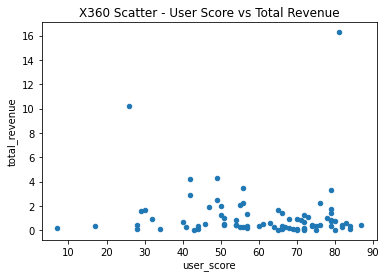

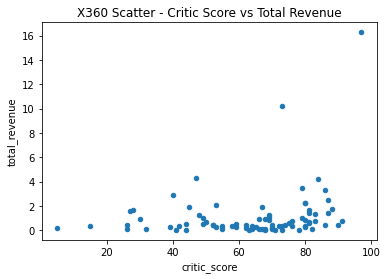

In [26]:
X360 = games_plat.query('platform == "X360"')
print("X360 Correlation Matrix")
display(X360.corr())

#Correlation Charts
X360.plot(kind = 'scatter', x = 'user_score', y = 'total_revenue')
plt.title('X360 Scatter - User Score vs Total Revenue')
plt.show()

X360.plot(kind = 'scatter', x = 'critic_score', y = 'total_revenue')
plt.title('X360 Scatter - Critic Score vs Total Revenue')
plt.show()

**Analysis: X360, same games from PS4**

Here we see some interesting things:
1. The correlation between critic scores and total revenue is much lower than seen in XOne and PS4.


2. The correlation between critic scores and user scores is much higher than seen in XOne and PS4. For XOne and PS4, the correlation between these scores ranges from 0.5 to 0.6. **For X360, its up to 0.8**, so for games in this platform, there is a high correlation between critic and user scores.

### Games and Genres
The objective now is to take a look at how the games are distributed amongst the genres, and which genres are the most profitable, looking at the revenue per game genre.

**Count of Games by Genre**

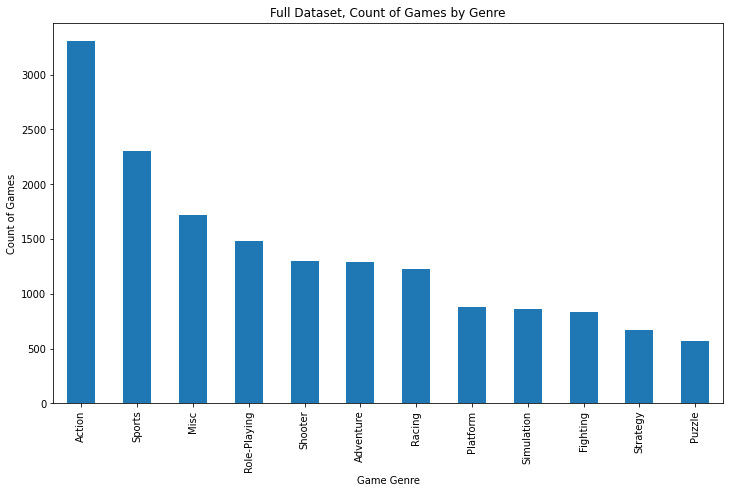

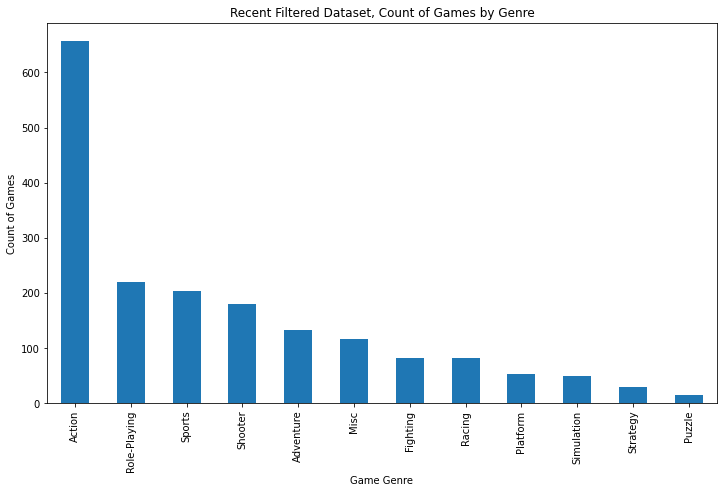

In [27]:
#Games distribution

#full dataset
df_1.groupby('genre')['name'].count().sort_values(ascending = False).plot(kind = 'bar', figsize = (12,7))
plt.xlabel('Game Genre')
plt.ylabel('Count of Games')
plt.title('Full Dataset, Count of Games by Genre')
plt.show()

#recent filtered dataset
df_1_filtered.groupby('genre')['name'].count().sort_values(ascending = False).plot(kind = 'bar', figsize = (12,7))
plt.xlabel('Game Genre')
plt.ylabel('Count of Games')
plt.title('Recent Filtered Dataset, Count of Games by Genre')
plt.show()

**Game Genre Analysis, Count**
 - The biggest game genre there is of all time is Action.
 
 
 - Sports is second if looking at the entire dataset, but falls to third when looking at the most recent splice of the dataset, and Role-Playing came in second.
 
 
 - There is a very significant difference between the Action game genre count versus the second highest, in both datasets.
 
 
 - For our 2017 modeling, here is the rank of biggest genres by game **count**, in the recent dataset:
 
     **1. Action** (around 3x bigger then the second place)
     2. Role-Playing
     3. Sports
     4. Shooter
     5. Adventure

**Revenue of Games by Genre**

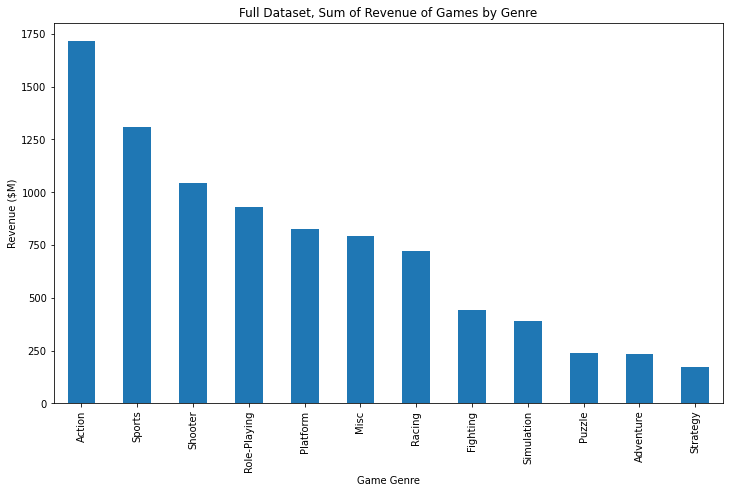

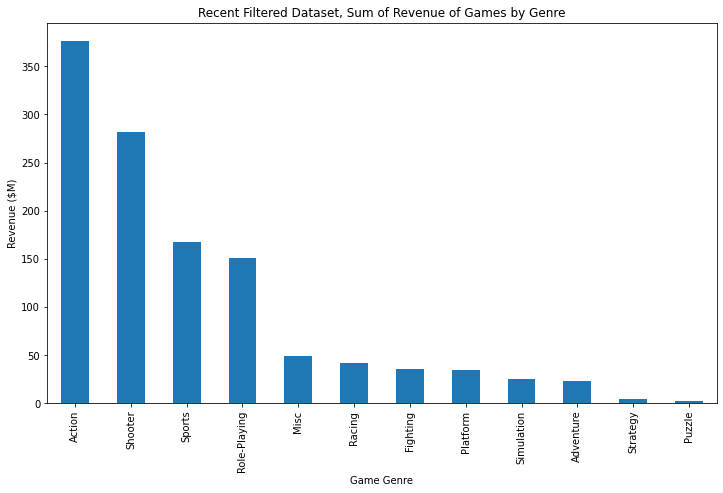

In [28]:
#full dataset
df_1.groupby('genre')['total_revenue'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (12,7))
plt.xlabel('Game Genre')
plt.ylabel('Revenue ($M)')
plt.title('Full Dataset, Sum of Revenue of Games by Genre')
plt.show()

#recent filtered dataset
df_1_filtered.groupby('genre')['total_revenue'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (12,7))
plt.xlabel('Game Genre')
plt.ylabel('Revenue ($M)')
plt.title('Recent Filtered Dataset, Sum of Revenue of Games by Genre')
plt.show()

**Game Genre Analysis, Revenue**
Some of the findings of the revenue of games per genre:
 - Action genre is the one which rakes in the most sales, both in the full dataset as in the most recent data dataset.
 
 
 - Shooter took second place and sports, third place, with Role-Playing coming only in fourth. Interesting to see that by game count, Role-Playing is second, but by revenue, its 4th.
 
 
 - For our 2017 modeling, here is the rank of **revenue** by game genre:
 
     **1.Action**, >30% higher revenue than second place
     2. Shooter
     3. Sports
     4. Role-Playing
     5. Misc


## Profiling Users per Region

In [29]:
#Looking at the recent dataset
df_1_filtered.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79


### Looking at Platform Revenue per Region
Here, we aim to look at:
1. Which region has the largest revenue overall?
2. Which gaming platforms have the most sales by platform per region?

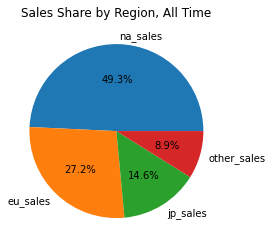

In [30]:
sales_share = (df_1[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum() / df_1_filtered['total_revenue'].sum())


plt.pie(sales_share, labels=sales_share.index, autopct='%1.1f%%')
plt.title('Sales Share by Region, All Time')
plt.show()

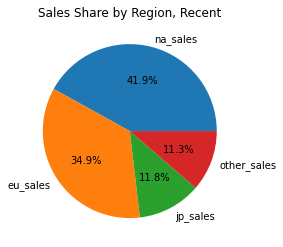

In [31]:
#Answering question 1
#Sales share by region, most recent dataset
sales_share = (df_1_filtered[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum() / df_1_filtered['total_revenue'].sum())


plt.pie(sales_share, labels=sales_share.index, autopct='%1.1f%%')
plt.title('Sales Share by Region, Recent')
plt.show()

The **biggest gaming market is in North America**, followed by Europe and then Japan.

In [32]:
#Answering question #2
#Grouping platform, returning sum of sales
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
print('Sales by region, by platform, filtered dataset')
for region in regions:
    print(region.upper())
    print(df_1_filtered.groupby('platform')[region].sum().sort_values(ascending = False))
    print()

Sales by region, by platform, filtered dataset
NA_SALES
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

EU_SALES
platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

JP_SALES
platform
3DS     87.79
PS3     35.29
PS4     15.96
X360     1.57
XOne     0.34
Name: jp_sales, dtype: float64

OTHER_SALES
platform
PS4     48.35
PS3     43.26
X360    20.40
XOne    14.27
3DS      8.87
Name: other_sales, dtype: float64



Here is what we observe from the data above, based on the selected platforms:
1. **In NA**, Xbox 360 has the largest market share, around 30% more than PS4, and PS4, PS3 and XOne have rather similar shares.


2. **In Europe**, the largest market share goes to PS4, which is around 30% higher than PS3 - So it seems that in Europe, Playstation by Sony is preferred over Microsoft's gaming platforms, the Xbox One and the X360.


3. **In Japan**, the platform with the largest market share, and by a large margin, is the 3DS, which is 148% higher than the second, PS3.


4. **In other countries**, Playstation platforms dominate most of the market.

### Looking at largest revenue per game genre, per region
Here, the objective is to answer the following questions:
1. We know the most commom genre overall is Action, but does it differ significantly by region?
2. Which game genres have the largest market share per region?

In [33]:
for region in regions:
    print(region.upper())
    print(df_1_filtered.groupby('genre')[region].sum().sort_values(ascending = False))
    print()

NA_SALES
genre
Action          153.47
Shooter         136.53
Sports           77.65
Role-Playing     51.81
Misc             22.86
Fighting         15.65
Platform         13.38
Racing           12.98
Adventure         8.19
Simulation        5.96
Strategy          1.61
Puzzle            0.51
Name: na_sales, dtype: float64

EU_SALES
genre
Action          136.51
Shooter         102.87
Sports           63.30
Role-Playing     38.04
Racing           22.70
Misc             14.43
Platform         12.53
Fighting          8.77
Adventure         7.84
Simulation        7.62
Strategy          1.20
Puzzle            0.89
Name: eu_sales, dtype: float64

JP_SALES
genre
Role-Playing    49.49
Action          40.95
Simulation      10.23
Shooter          7.58
Fighting         7.41
Misc             6.61
Sports           5.61
Platform         4.89
Adventure        4.28
Strategy         1.59
Puzzle           1.21
Racing           1.10
Name: jp_sales, dtype: float64

OTHER_SALES
genre
Action          45.32
Sho

**Insights**
 - For the game genre market shares by region, we see a certain pattern: NA and EU both follow what we saw earlier in the total revenue by genre, which is 1. Action, 2. Shooter, 3. Sports.
 
 
 - Japan differs, with Role-Playing games having the largest market share, followed by Action and then Simulation.
 
One last metric we can still look at are the ESRB ratings and if there is any correlation between it and the revenues in the regions. Lets check it.

In [34]:
print('Filtered Data')
print(df_1_filtered['rating'].value_counts())
print()
print('Full Data')
df_1['rating'].value_counts()

Filtered Data
M       360
T       291
E       272
E10+    204
Name: rating, dtype: int64

Full Data


E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Lets keep only the most common values for ESRB - We'll run the correlations test in both the filtered dataset and the full one, getting rid of the EC, K-A, AO and RP values.


**Lets also take another look at the general correlations between the data and the ratings.**

In [35]:
#Filtering the dataset to remove low freq. of ratings
low_number_ratings = ['EC','K-A','AO','RP']
df_1 = df_1.query('rating != @low_number_ratings')
df_1['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
Name: rating, dtype: int64

In [36]:
#Creating a map for ratings with numbers, to be able to create a correlation
#Dictionary mapping ESRB ratings to numbers, based on age (lower age, lower number)
esrb_ratings = {
    "E": 1,
    "E 10+": 2,
    "T": 3,
    "M": 4
}

#Create the new column 'rating_number' using 'map'
df_1['rating_number'] = df_1['rating'].map(esrb_ratings)
df_1_filtered['rating_number'] = df_1_filtered['rating'].map(esrb_ratings)

# Display the updated DataFrame
display(df_1.head(1))
display(df_1_filtered.head(1))



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue,rating_number
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54,1.0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue,rating_number
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05,4.0


Full Data Correlation Table


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_revenue,rating_number
year_of_release,1.000000,-0.092132,0.004096,-0.168153,0.037821,-0.032321,-0.219936,-0.076013,0.144221
na_sales,-0.092132,1.000000,0.766699,0.451593,0.638649,0.226305,0.100423,0.941302,0.031310
eu_sales,0.004096,0.766699,1.000000,0.436152,0.722680,0.206790,0.072454,0.901734,0.044380
jp_sales,-0.168153,0.451593,0.436152,1.000000,0.291744,0.148503,0.132630,0.613515,-0.008312
other_sales,0.037821,0.638649,0.722680,0.291744,1.000000,0.186103,0.071444,0.749006,0.054323
critic_score,-0.032321,0.226305,0.206790,0.148503,0.186103,1.000000,0.684742,0.231340,0.091059
user_score,-0.219936,0.100423,0.072454,0.132630,0.071444,0.684742,1.000000,0.104055,0.091061
total_revenue,-0.076013,0.941302,0.901734,0.613515,0.749006,0.231340,0.104055,1.000000,0.037264
rating_number,0.144221,0.031310,0.044380,-0.008312,0.054323,0.091059,0.091061,0.037264,1.000000


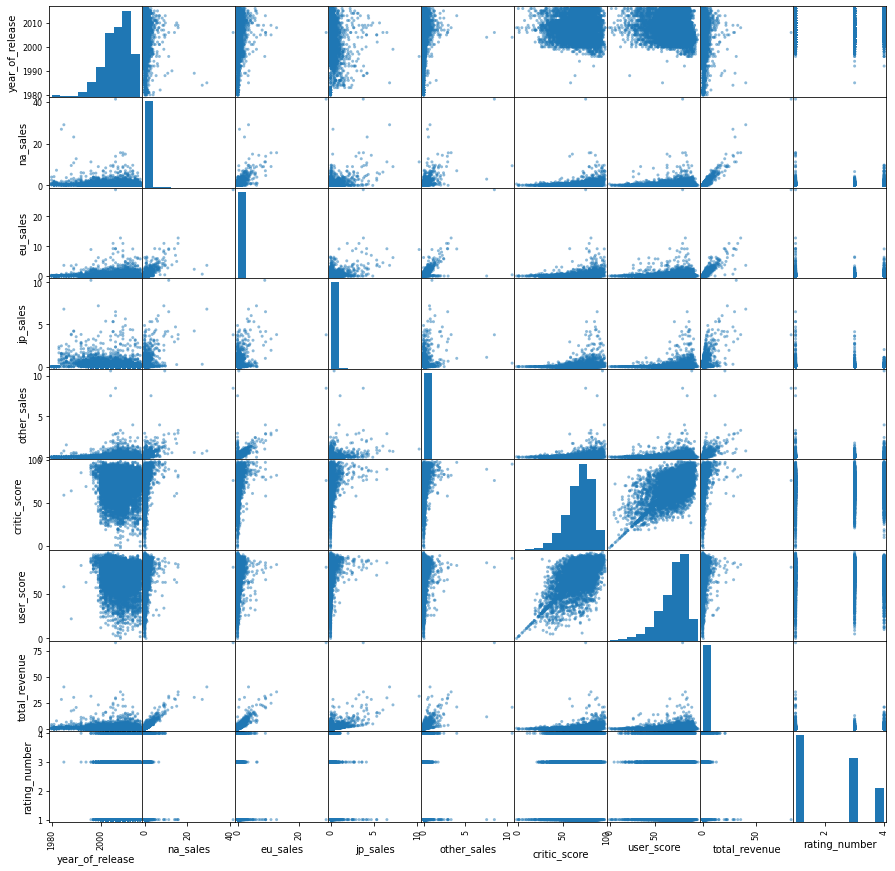


Filtered Data Correlation Table


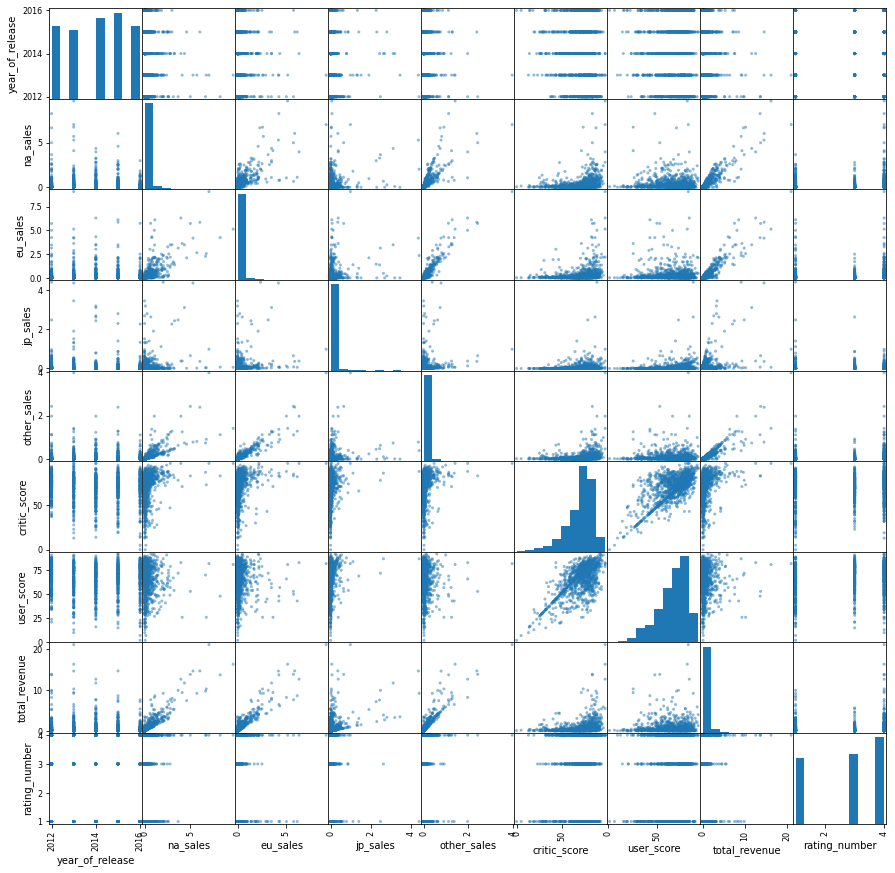

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_revenue,rating_number
year_of_release,1.000000,-0.122758,-0.071102,-0.075697,-0.077046,-0.081090,-0.022403,-0.109686,-0.063465
na_sales,-0.122758,1.000000,0.754916,0.233597,0.785814,0.284115,-0.021264,0.914417,0.110700
eu_sales,-0.071102,0.754916,1.000000,0.245910,0.938549,0.262393,-0.013328,0.927685,0.058314
jp_sales,-0.075697,0.233597,0.245910,1.000000,0.180922,0.132856,0.151235,0.422052,-0.036556
other_sales,-0.077046,0.785814,0.938549,0.180922,1.000000,0.267005,-0.005096,0.912303,0.088078
critic_score,-0.081090,0.284115,0.262393,0.132856,0.267005,1.000000,0.671629,0.300262,0.108589
user_score,-0.022403,-0.021264,-0.013328,0.151235,-0.005096,0.671629,1.000000,0.003241,0.224128
total_revenue,-0.109686,0.914417,0.927685,0.422052,0.912303,0.300262,0.003241,1.000000,0.084021
rating_number,-0.063465,0.110700,0.058314,-0.036556,0.088078,0.108589,0.224128,0.084021,1.000000


In [37]:
#Building correlation between region sales and ratings
print('Full Data Correlation Table')
display(df_1.corr())
pd.plotting.scatter_matrix(df_1, figsize=(15, 15))
plt.show()

print()

print('Filtered Data Correlation Table')
pd.plotting.scatter_matrix(df_1_filtered, figsize=(15, 15))
plt.show()
display(df_1_filtered.corr())

That is a lot of information to take in, so I'll break it down to what we are looking for:
 - There is no significant correlation between the ratings and the sales in any region, both for the full and filtered dataset.
 
 
 - In the filtered dataset, there is a weak positive correlation between the ESRB rating and the user_score, meaning, the higher the ESRB rating, the higher the user_score tends to be. Still, it's a weak correlation, so its not a make it or break it factor.

## Hypothesis Testing
Time to test the 2 hypothesis we layed out at the beginning of the project:
  1. Average user score for PC and Xbox One users are the same.
  
   - H0: User Score average for PC = User Score average for XOne.
   - HA: User Score average for PC ≠ User Score average for XOne.
   
   
  2. Average user score for Action genre and Sports genre are the same.
  
    - H0: User Score average for Action = User Score average for Sports.
    - HA: User Score average for Action ≠ User Score average for Sports.
  
We'll consider an **alpha of 0.05**, meaning we'll have 95% of confidence in the results.

Let's get to it!

We'll run the statistical tests twice:
 - With the df_1 NaN values dropped (less bias possible).
 - With the df_1 NaN values filled with mean (possibly more biased). The mean will be as specific as possible (filtered by platform, genre and year_of_release).
 
Then we'll check if there are any significant differences.

### Testing our first hypothesis
 - Average user score for PC and Xbox One users are the same.

In [38]:
#Testing First Hypothesis, Full Data
#looking at the var of the samples, checking if they can be considered equal

#First, for the statistical tests, we'll have to handle the missing values.
df_1_dropna = df_1
df_1_dropna = df_1_dropna.dropna(subset = ['user_score']).reset_index(drop = True)
len(df_1_dropna)

8546

In [39]:
#Code for tests with empty values dropped
print("Full Dataset - Empty Values Dropped")
PC_sample = df_1_dropna.query('platform == "PC"')['user_score']
XOne_sample = df_1_dropna.query('platform == "XOne"')['user_score']

print('PC User Score Variance:', PC_sample.var())
print('XOne User Score Variance:', XOne_sample.var())
print()

#Test chosen to compare two samples
results = st.ttest_ind(
PC_sample,
XOne_sample,
equal_var = True)

alpha = 0.05

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')

if results.pvalue > alpha:
    print('We accept the null hypothesis')
    

Full Dataset - Empty Values Dropped
PC User Score Variance: 234.05491859389136
XOne User Score Variance: 188.65132229003194

p-value:  7.623153668330036e-06
We reject the null hypothesis


In [40]:
#Now, same as above, but instead of drop the missing values, we'll fill the missing values with mean.
df_1_fillna = df_1
df_1_fillna['user_score'] = df_1.groupby(['genre', 'year_of_release', 'platform'])['user_score'].transform(lambda x: x.fillna(x.mean()))
df_1_fillna = df_1_fillna.dropna(subset = ['user_score']).reset_index(drop = True)

print("Full Dataset, Empty Values filled with mean")
PC_sample = df_1_fillna.query('platform == "PC"')['user_score']
XOne_sample = df_1_fillna.query('platform == "XOne"')['user_score']

print('PC User Score Variance:', PC_sample.var())
print('XOne User Score Variance:', XOne_sample.var())
print()

#Test chosen to compare two samples
results = st.ttest_ind(
PC_sample,
XOne_sample,
equal_var = True)

alpha = 0.05

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')

if results.pvalue > alpha:
    print('We accept the null hypothesis')


print()
print('User Score Averages, for comparison')
print(df_1_fillna.groupby('platform')['user_score'].mean())

Full Dataset, Empty Values filled with mean
PC User Score Variance: 207.44374645780482
XOne User Score Variance: 165.05545885536827

p-value:  5.525188063692975e-06
We reject the null hypothesis

User Score Averages, for comparison
platform
3DS     68.976088
DC      83.653846
DS      66.526249
GBA     71.056270
GC      73.787596
PC      70.701827
PS      79.032949
PS2     74.357146
PS3     66.745632
PS4     68.824841
PSP     68.402031
PSV     74.965722
Wii     65.684879
WiiU    69.177605
X360    66.378076
XB      73.221245
XOne    66.067203
Name: user_score, dtype: float64


#### First Hypothesis results summary
- The test results, both for the dataset where we dropped the missing values and for the dataset where we filled the missing values **rejected the null hypothesis.** This means, with 95% confidence, that the average user scores for PC games is not equal to the average user scores for Xbox One games.


Let's move on to test our second hypothesis of the project.

### Testing our second hypothesis
- Average user score for Action genre and Sports genre are the same.

In [41]:
#Code for test with empty values dropped dataset
print("Full Dataset - Empty Values Dropped")
Action_sample = df_1_dropna.query('genre == "Action"')['user_score']
Sports_sample = df_1_dropna.query('genre == "Sports"')['user_score']

print('Action User Score Variance:', Action_sample.var())
print('Sports User Score Variance:', Sports_sample.var())
print()

#Test chosen to compare two samples
results = st.ttest_ind(
Action_sample,
Sports_sample,
equal_var = True)

alpha = 0.05

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')

if results.pvalue > alpha:
    print('We accept the null hypothesis')
    

Full Dataset - Empty Values Dropped
Action User Score Variance: 201.75460246899527
Sports User Score Variance: 249.3306523127234

p-value:  0.18931737971532261
We accept the null hypothesis


In [42]:
#Code for empty values filled
print("Full Dataset - Empty Values Filled")
Action_sample = df_1_fillna.query('genre == "Action"')['user_score']
Sports_sample = df_1_fillna.query('genre == "Sports"')['user_score']

print('Action User Score Variance:', Action_sample.var())
print('Sports User Score Variance:', Sports_sample.var())
print()

#Test chosen to compare two samples
results = st.ttest_ind(
Action_sample,
Sports_sample,
equal_var = True)

alpha = 0.05

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')

if results.pvalue > alpha:
    print('We accept the null hypothesis')

print()
print('User Score Averages, for comparison')
print(df_1_fillna.groupby('genre')['user_score'].mean())

Full Dataset - Empty Values Filled
Action User Score Variance: 170.69987294352507
Sports User Score Variance: 187.84360893971663

p-value:  0.951246275472324
We accept the null hypothesis

User Score Averages, for comparison
genre
Action          68.810799
Adventure       68.899270
Fighting        73.347055
Misc            67.517121
Platform        71.866965
Puzzle          69.535023
Racing          69.803130
Role-Playing    76.725584
Shooter         69.995314
Simulation      67.491556
Sports          68.787531
Strategy        72.190988
Name: user_score, dtype: float64


#### Second Hypothesis results summary
- The test results, both for the dataset where we dropped the missing values and for the dataset where we filled the missing values **accepted the null hypothesis.** This means, with 95% confidence, that the average user scores for Action games is statistically the same as for Sports games.

## Project Summary & Outcomes
 - After a long journey, here we are. Let's wrap up the highlights of what was done, and what were the main insights we got from this project, so we can better model and plan our 2017 ad campaign efforts.

**Which games are successful?**
 - Our analysis shows that our ad campaigns should be focused on games that have the following characteristics:
    
    1.**Genre: Action**, Shooter optional - This is by far the most popular & largest revenue generating game genre there is on the markets across all regions, except Japan (but by a small margin).
    
    2.**Region: North America**, then Europe - The revenues come mostly from the North American market, but the European market is also relevant. If we can launch campaigns in both regions, it's worth the shot. This way, we'll capture 77% of the market, vs 42% for North America alone.
    
    3.**Platform: PS4**, XOne optional - With the largest revenue size in 2016 so far (remember that we don't have full 2016 data), this platform covers us both in the NA markets but mainly in European markets. Despite the highest revenue coming from X360 games in the NA region in the last 5 years, the platform is at the end of its lifecycle. We can generalize the analyzed platform's lifecycles into 8-10 years, with the first half marked by sales growth, and the second half marked by a decline. What this means is that the PS4, lauched in 2013, is still in the first half of its lifecycle (growth), together with the XOne.
    
    4.**Critic Score: Higher, Better (75)** - We've found a 0.4 positive correlation between critic scores and total revenue for PS4 and Xbox One games, so we should focus on making ads campaigns for games with the highest critic scores over average/low critic scores. In this case, we can look at games with a critic score at or above 75, which is where total revenue really starts to ramp up the higher critic score.
    
    5.**Hypothesis Tested, outcomes** - We've tested the hypothesis that the average user scores were the same across the genres Action and Sports, and it turns out that statistically, they are the same. But this cannot be said between platform average user scores for PC versus Xbox One. We can expand on this, and do a few more tests, but the overall lesson here is that, in terms of user scores, it's not that important if we are doing ads for games from the Sports genre versus the Action genre, because at the end, the average user score for both genres is the same. In regards to platforms PC and XOne, it matters more, because one has a statistically higher average user score than the other (PC higher than XOne).
    
    6.**ESRB ratings, no correlation** - The ESRB ratings don't seem to have a strong influence on any other metric analysed from the dataset.
    
**Summary**

The most profitable ad campaign we can do in 2017 are for games from the **action** genre, for the **north american public**, for the **PS4** platform, and for games with a **critic score as high as possible**, at least above 75.